# **Capstone Project 2**

## **Basic Libraries and Functions**

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.ensemble import GradientBoostingClassifier ,AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import confusion_matrix,classification_report

# Preprocessing tools
from sklearn.model_selection import train_test_split
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting theme
sns.set_theme(palette='tab10',
              font_scale=1.0)
import matplotlib
matplotlib.rcParams.update({'font.size':10})
plt.style.use('dark_background')

In [3]:
# For returning lower and upper value beyond which the values are considered outliers
def remove_outlier(col_1):
  sorted(col_1)
  q1,q3 = col_1.quantile([0.25,0.75])
  IQR = q3 - q1
  lower_value = q1 - (1.5*IQR)
  upper_value = q3 + (1.5*IQR)
  return lower_value,upper_value

In [4]:
# For removing outliers from all float and integer columns of dataframe(only used int64 or float64 as they were the only ones in dataset which required purification)
def data_pure(df):
  for col in df.columns:
    lower_col,upper_col = remove_outlier(df[col])
    df[col] = np.where(df[col] > upper_col,upper_col,df[col])
    df[col] = np.where(df[col] < lower_col,lower_col,df[col])

## **Data Import and Preprocessing**

In [5]:
# Reading the csv file and storing it in df dataframe
df = pd.read_csv('/content/h1n1_vaccine_prediction.csv')

### **Identification and Elimination of Unnecessary Columns**

In [6]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [7]:
# Making a columnwise dictionary of frequency of all the values in a column

# Create a dictionary to store counts DataFrames
counts_dfs = {}

for column in df.columns:
    value_counts = df[column].value_counts().reset_index()
    value_counts.columns = [column, f'{column}_count']
    counts_dfs[column] = value_counts

# Display the counts DataFrames
for column, counts_df in counts_dfs.items():
    print(f"Value Counts for {column}:")
    print(counts_df)
    print()

Value Counts for unique_id:
       unique_id  unique_id_count
0              0                1
1          17736                1
2          17812                1
3          17811                1
4          17810                1
...          ...              ...
26702       8898                1
26703       8897                1
26704       8896                1
26705       8895                1
26706      26706                1

[26707 rows x 2 columns]

Value Counts for h1n1_worry:
   h1n1_worry  h1n1_worry_count
0         2.0             10575
1         1.0              8153
2         3.0              4591
3         0.0              3296

Value Counts for h1n1_awareness:
   h1n1_awareness  h1n1_awareness_count
0             1.0                 14598
1             2.0                  9487
2             0.0                  2506

Value Counts for antiviral_medication:
   antiviral_medication  antiviral_medication_count
0                   0.0                       25335
1         

⭐**Note:**
* As we can see from above value count tables unique id is just for indexing of samples and has frequecncy 1 for all values.
* Hence it can be dropped to reduce the dimensionality of input data without affecting model performance.  

In [8]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

 ⭐**Note:**

 * From above we can see that some columns have more missing values which might lead to bad performace of models these columns are:
* has_health_insur
* income_level

* For better model performance these columns should be dropped.

In [9]:
# Dropping columns with more null values and less correlation with target variable
df =df.drop(['has_health_insur','income_level','unique_id'],axis= 1)

### **Data Visualization and Null Value Removal**

#### Before Null Value Removal

In [10]:
df.sample(10).style.background_gradient(cmap='coolwarm')

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
19615,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000,1.000000,5.000000,5.000000,1.000000,18 - 34 Years,Some College,White,Female,Married,Own,Employed,Non-MSA,1.000000,2.000000,1
23153,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,4.000000,4.000000,4.000000,2.000000,18 - 34 Years,Some College,White,Female,Married,Rent,Not in Labor Force,Non-MSA,1.000000,2.000000,0
24912,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,2.000000,4.000000,4.000000,1.000000,65+ Years,Some College,White,Female,Married,Own,Not in Labor Force,"MSA, Principle City",1.000000,0.000000,0
3074,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,4.000000,1.000000,1.000000,55 - 64 Years,College Graduate,White,Female,Not Married,Own,Employed,"MSA, Not Principle City",1.000000,0.000000,0
25674,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,1.000000,55 - 64 Years,College Graduate,White,Male,Married,Own,Not in Labor Force,"MSA, Not Principle City",1.000000,0.000000,0
9843,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,5.000000,4.000000,1.000000,35 - 44 Years,College Graduate,White,Male,Married,Own,Employed,"MSA, Principle City",1.000000,2.000000,0
19432,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,4.000000,4.000000,2.000000,1.000000,18 - 34 Years,Some College,White,Female,Married,Rent,Employed,Non-MSA,1.000000,3.000000,0
17128,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,5.000000,1.000000,2.000000,55 - 64 Years,< 12 Years,White,Female,Married,Own,Employed,Non-MSA,1.000000,0.000000,0
24580,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1.000000,5.000000,1.000000,1.000000,65+ Years,Some College,White,Female,Not Married,Own,Not in Labor Force,"MSA, Principle City",0.000000,0.000000,0
23683,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,1.000000,1.000000,65+ Years,Some College,White,Female,Married,Own,Not in Labor Force,"MSA, Principle City",1.000000,0.000000,0


In [11]:
df.describe().style.background_gradient(cmap='rainbow')

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.000000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.358640,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.479610,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


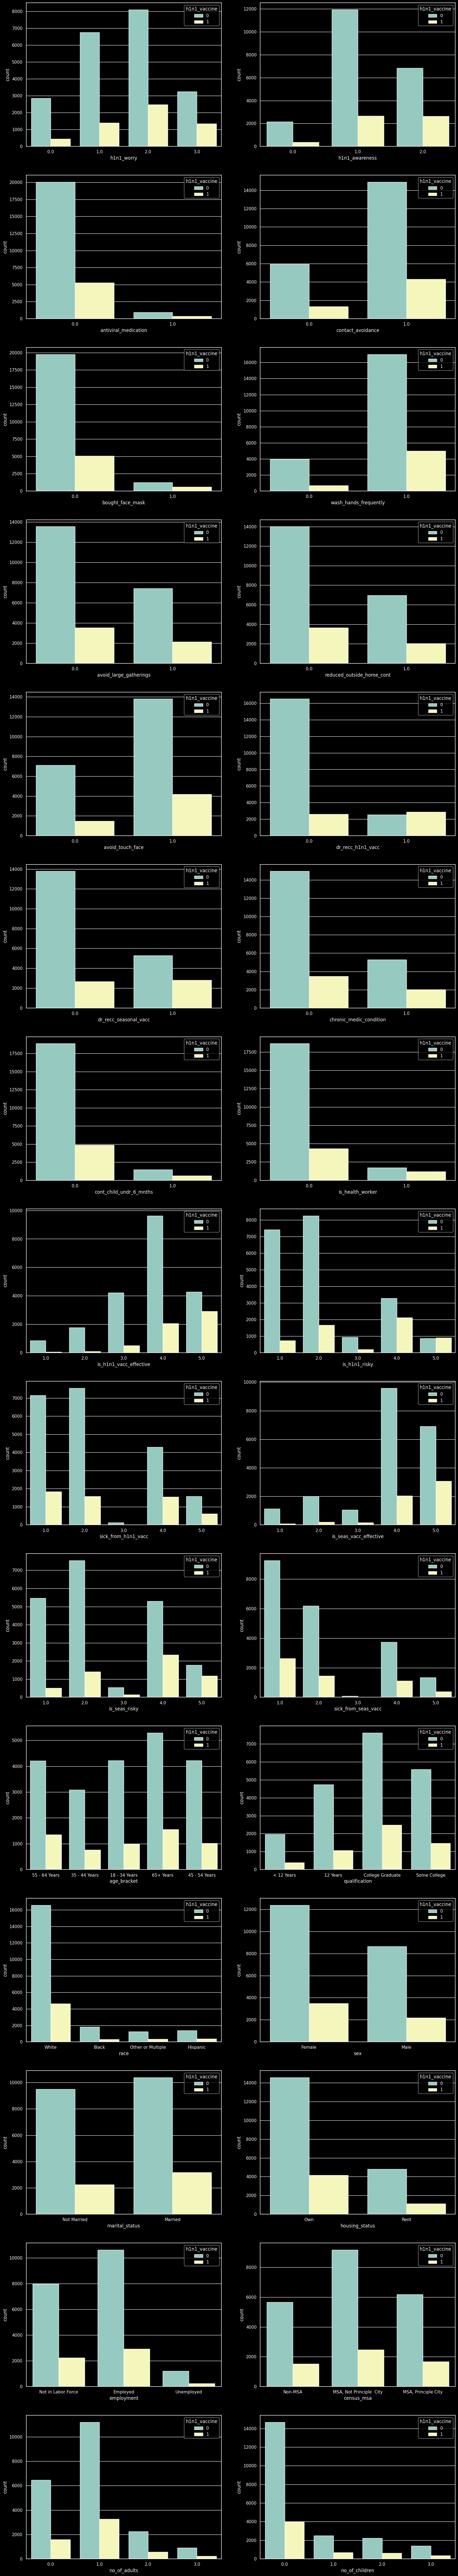

In [12]:
# DataFrame representation without null value removal
fig,axes = plt.subplots(15,2,figsize=(20,120))
for idx, x in enumerate(df.drop(['h1n1_vaccine'],axis=1).columns): # plotting for all columns except the target variable
  row, col = (idx // 2), idx % 2
  sns.countplot(x=x, data=df, hue='h1n1_vaccine', ax=axes[row, col])

plt.subplots_adjust()
plt.show()

In [13]:
# Checking for data type of all columns and checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

<Axes: >

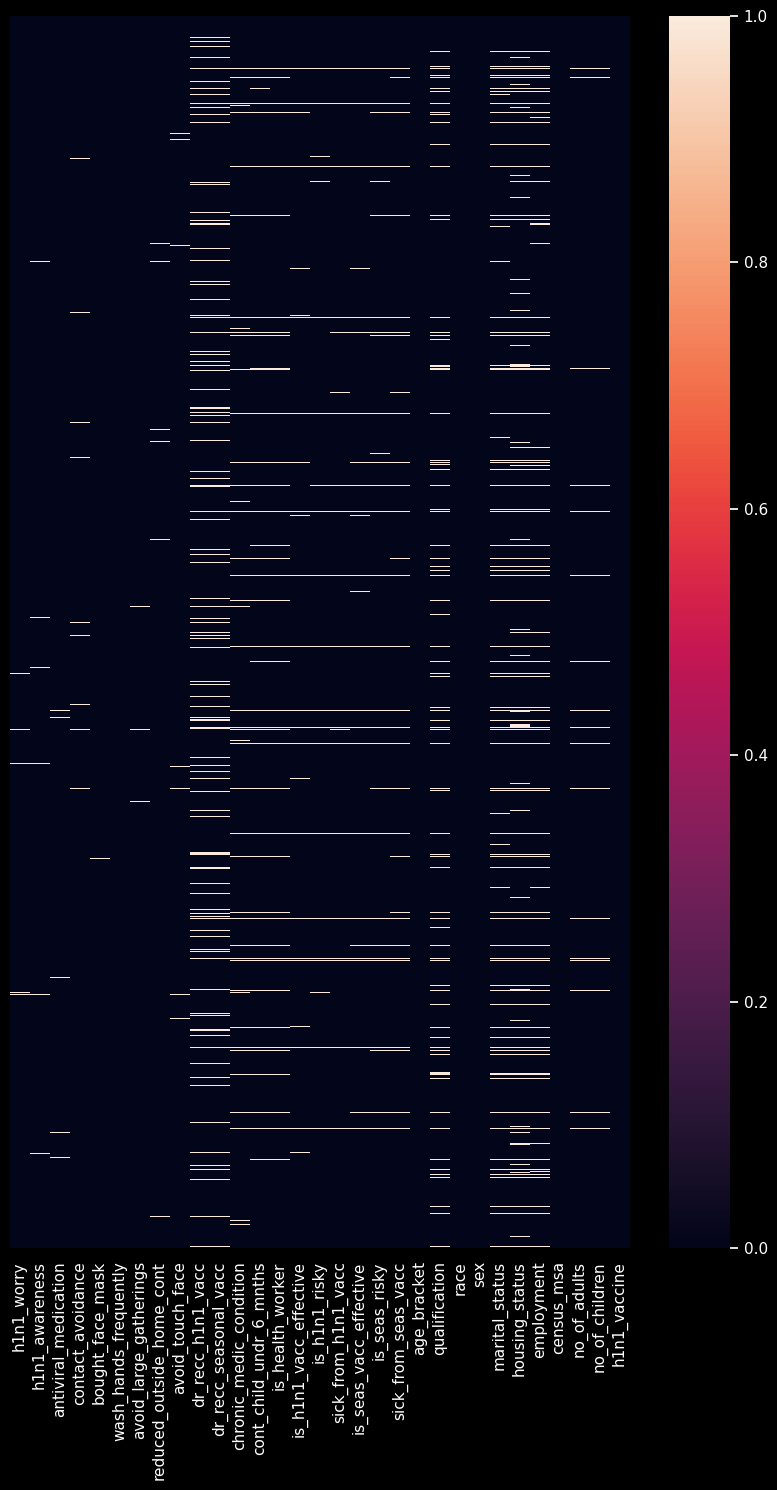

In [14]:
# Visualizing null values in all columns
plt.figure(figsize=(10,16))
sns.heatmap(df.isnull(),yticklabels=False)

#### After Null Value Removal  

In [15]:
# Replacing all the null values in the numerical columns with the median of the distribution
for col in df.columns:
  if(df[col].dtype == 'int64' or df[col].dtype == 'float64'):
    df[col] = df[col].replace(to_replace=np.nan,value=df[col].median())

In [16]:
# Replacing all the null values in the non-numerical data with the mode of the distribution
for col in df.columns:
  if(df[col].dtype != 'int64' and df[col].dtype != 'float64'):
    df[col] = df[col].replace(to_replace=np.nan,value=df[col].mode().values[0])

* Since the dataframe has only float64, int64 and object datatypes in numerical columns.

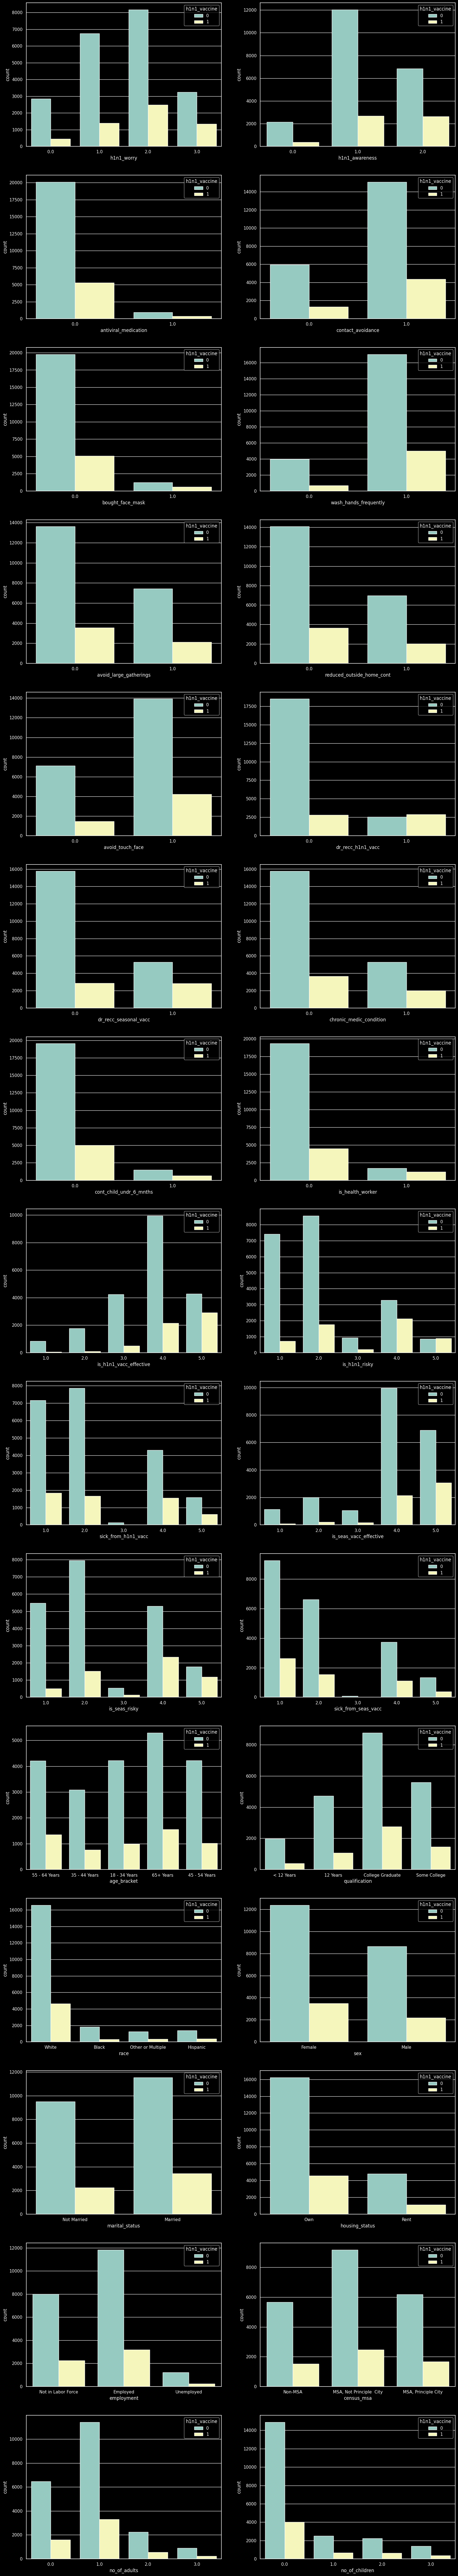

In [17]:
# DataFrame representation with null value removal
fig,axes = plt.subplots(15,2,figsize=(20,120))
for idx, x in enumerate(df.drop(['h1n1_vaccine'],axis=1).columns): # plotting for all columns except the target variable
  row, col = (idx // 2), idx % 2
  sns.countplot(x=x, data=df, hue='h1n1_vaccine', ax=axes[row, col])

plt.subplots_adjust()
plt.show()

In [18]:
# Checking for data type of all columns and checking if all the null values have been removed or not
df.info()
print()
print('Null Value Count:')
print()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

<Axes: >

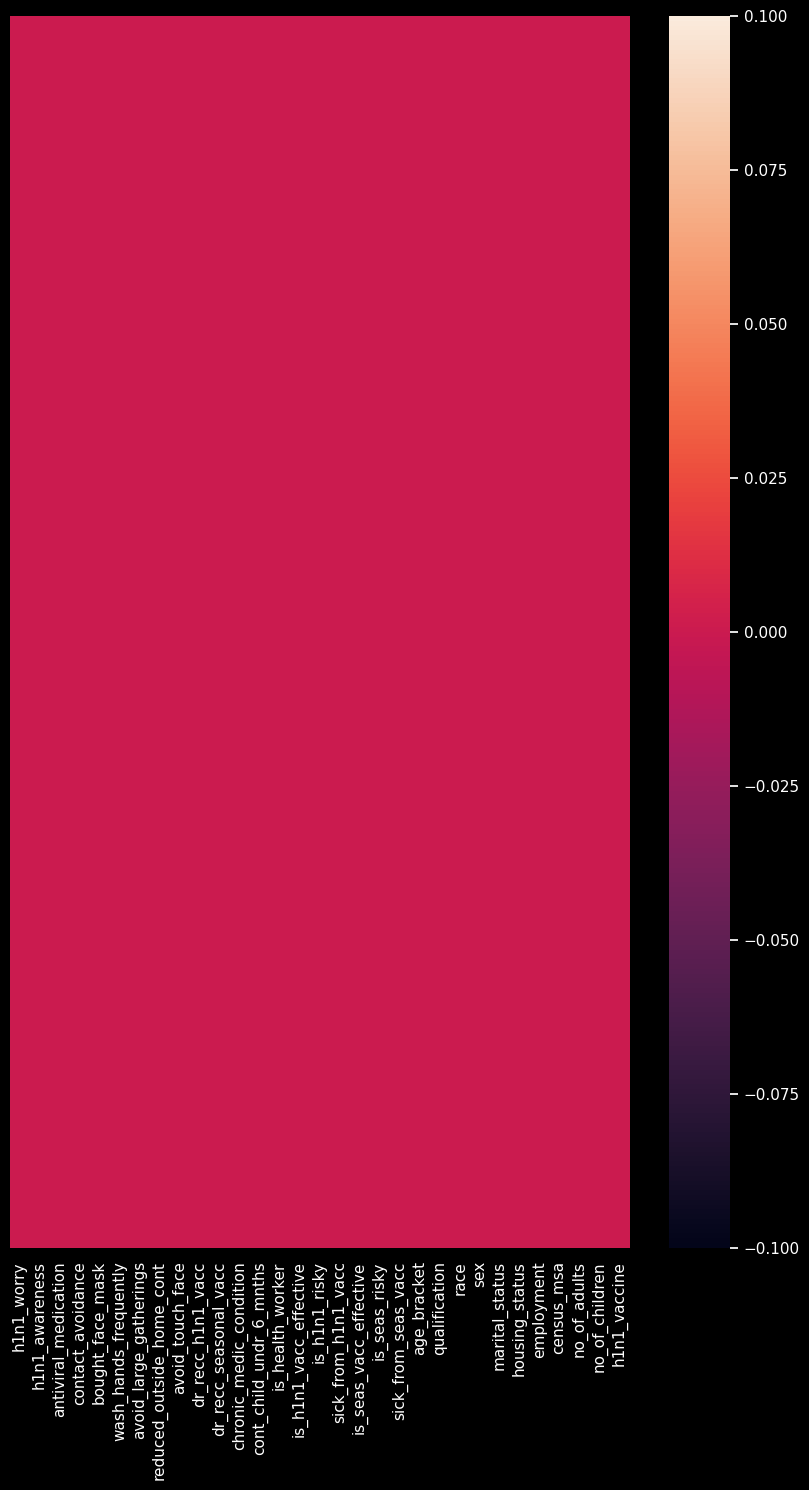

In [19]:
# Visualizing null values in all columns
plt.figure(figsize=(10,16))
sns.heatmap(df.isnull(),yticklabels=False)

* Hence all the null values in dataframe have been replaced by

### **Data Encoding**

In [20]:
# For encoding the object type columns into float format
for col in df.columns:
  if(df[col].dtype != 'int64' and df[col].dtype != 'float64'):
    df[col] = le.fit_transform(df[col])

### **Data Split and Standardization**

In [27]:
# Taking a small sample of data for Random Search in support vector model
sample_df = df.sample(frac=0.2, random_state=1)

X_sample = sample_df.drop('h1n1_vaccine',axis=1)
Y_sample = sample_df['h1n1_vaccine']

In [28]:
# Standardizing Sample Data for better model performance
sc = StandardScaler()
X_sample = sc.fit_transform(X_sample)

In [23]:
# Creating train and test splits
X = df.drop('h1n1_vaccine',axis=1)
Y = df['h1n1_vaccine']

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size = 0.20,random_state=1)

In [24]:
# Standardizing Data for better model performance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
# Encoded and Standardized DataFrame
df.sample(10).style.background_gradient(cmap='coolwarm')

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
15018,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,5.000000,4.000000,2.000000,0,0,0,0,1,0,0,1,2.000000,0.000000,0
5015,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,2.000000,4.000000,4.000000,4.000000,2.000000,2,0,3,0,1,1,0,1,2.000000,0.000000,0
25950,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,1.000000,1.000000,3,2,3,1,0,0,2,0,2.000000,0.000000,0
17145,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,5.000000,1.000000,4,3,3,0,0,0,1,1,1.000000,0.000000,0
19305,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2,2,3,0,1,0,0,1,0.000000,0.000000,1
3941,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,5.000000,2.000000,1.000000,3,2,3,0,1,0,2,1,1.000000,0.000000,0
12171,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,4.000000,3.000000,2.000000,4.000000,2,2,3,0,0,0,0,1,1.000000,0.000000,0
4550,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000,5.000000,1.000000,4.000000,4.000000,1.000000,1,2,3,0,0,0,0,2,1.000000,3.000000,1
21698,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0,3,0,1,1,1,0,1,1.000000,0.000000,0
7783,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,2.000000,4,2,3,1,0,0,1,2,0.000000,0.000000,0


<Axes: >

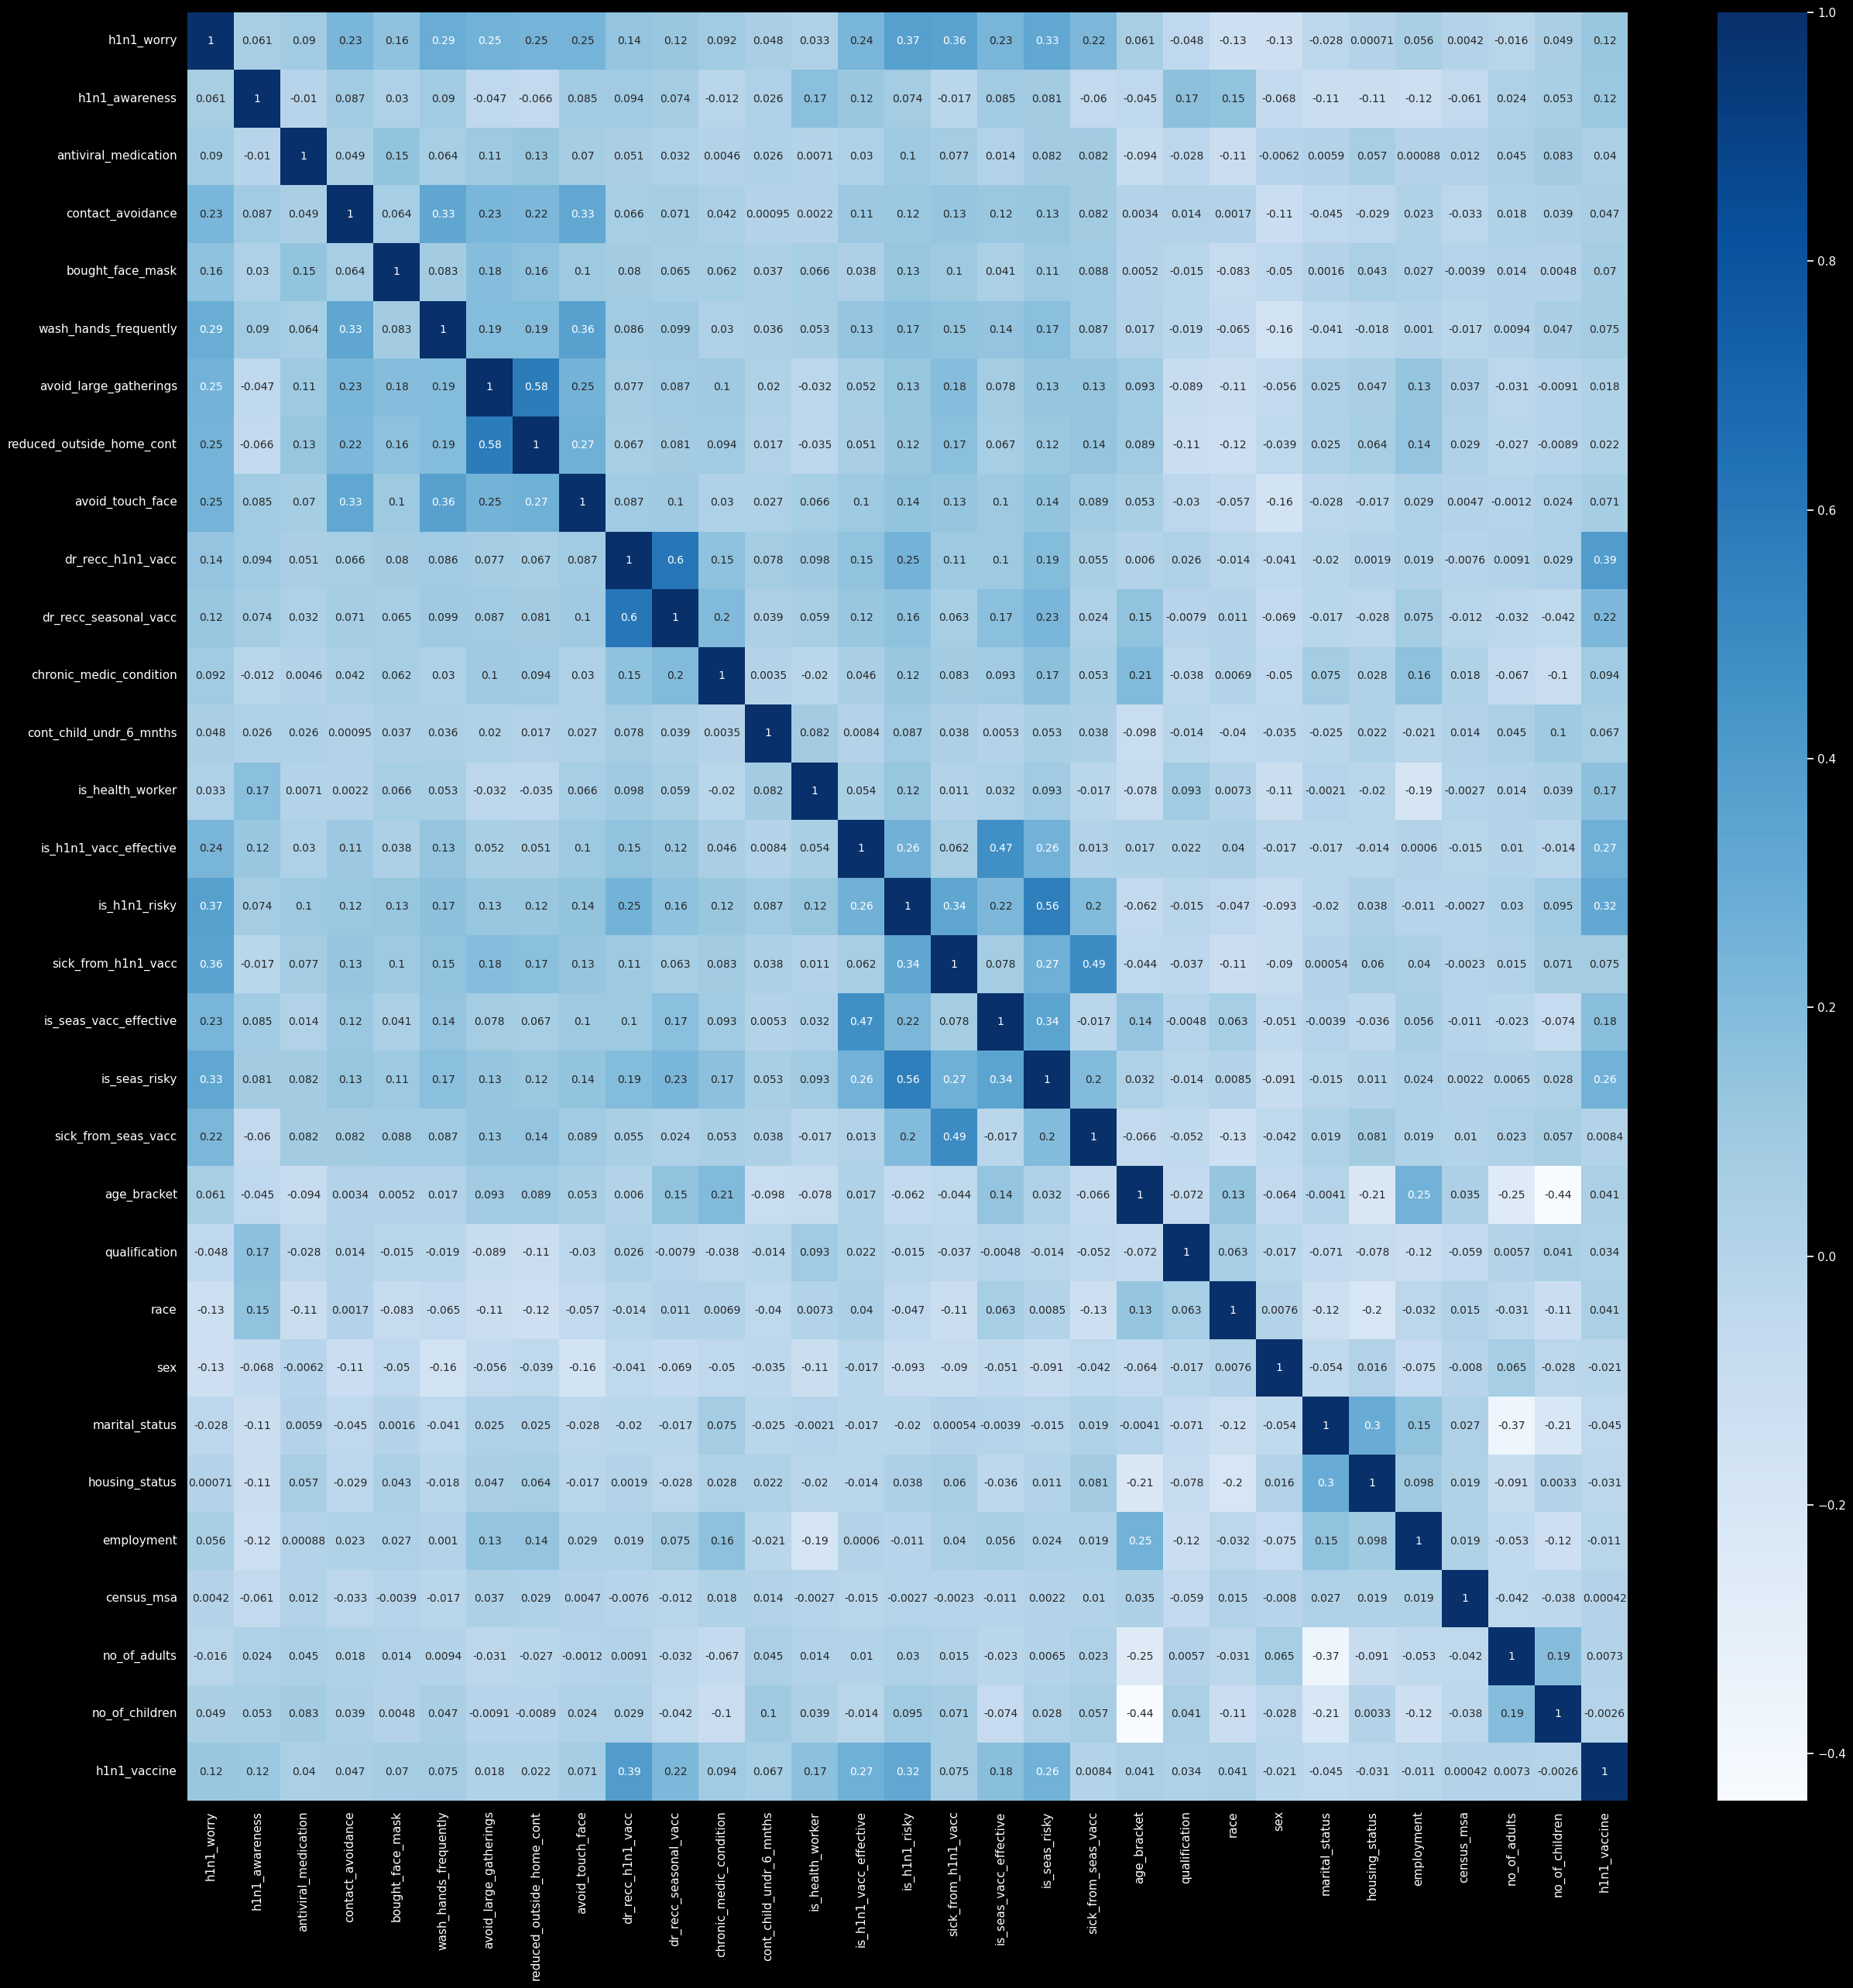

In [26]:
# Correlation matrix after encoding and standardizing data
correlation_mat = df.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlation_mat, annot=True, linewidths=0, ax=ax,cmap='Blues')

* Consequently, the encoded and standardized data exhibits a noticeable correlation and is prepared for the modeling phase.

## **Models**

### **Logistic Regression Model**

#### Without Tuning

In [25]:
# Initializing model
model_log = LogisticRegression()

In [26]:
# Fitting model without tuning for comparision
model_log.fit(X_train,Y_train)

LogisticRegression()

In [27]:
# Evaluating model performance
print (f'Train Accuracy - : {model_log.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {model_log.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.83501
Test Accuracy - : 0.84126


In [28]:
# Classification Report
class_report = classification_report(Y_test, model_log.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4220
           1       0.71      0.42      0.53      1122

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.83      5342



<Axes: >

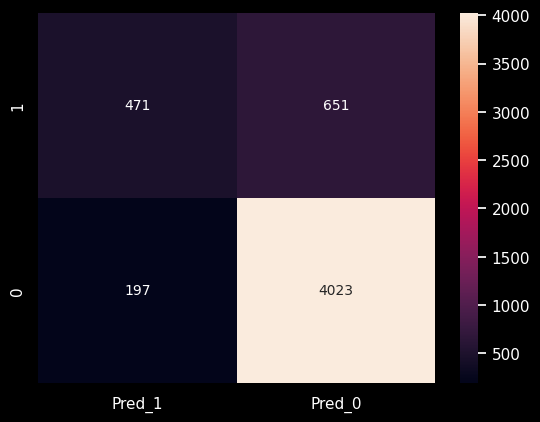

In [29]:
# Confusion matrix
pred = model_log.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

#### With Tuning

In [30]:
# For finding the optimum value of hyperparameters
max_iter = range(100, 500)
solver = ['lbfgs', 'newton-cg', 'liblinear']
warm_start = [True, False]
C = np.arange(0, 1, 0.01)

param_grid_log={'max_iter' : max_iter,
               'warm_start' : warm_start,
               'solver' : solver,
               'C' : C,}

# Create the RandomizedSearchCV object
log_RandomGrid = RandomizedSearchCV(model_log,
                                    param_distributions=param_grid_log,
                                    verbose=2,
                                    n_iter=20,
                                    scoring='accuracy',
                                    cv=5,
                                    random_state=1)

# Fitting the tuned model with optimum values of hyperparamters
log_RandomGrid.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=0.53, max_iter=239, solver=newton-cg, warm_start=False; total time=   0.1s
[CV] END C=0.53, max_iter=239, solver=newton-cg, warm_start=False; total time=   0.1s
[CV] END C=0.53, max_iter=239, solver=newton-cg, warm_start=False; total time=   0.1s
[CV] END C=0.53, max_iter=239, solver=newton-cg, warm_start=False; total time=   0.1s
[CV] END C=0.53, max_iter=239, solver=newton-cg, warm_start=False; total time=   0.1s
[CV] END C=0.9500000000000001, max_iter=368, solver=newton-cg, warm_start=False; total time=   0.1s
[CV] END C=0.9500000000000001, max_iter=368, solver=newton-cg, warm_start=False; total time=   0.1s
[CV] END C=0.9500000000000001, max_iter=368, solver=newton-cg, warm_start=False; total time=   0.1s
[CV] END C=0.9500000000000001, max_iter=368, solver=newton-cg, warm_start=False; total time=   0.1s
[CV] END C=0.9500000000000001, max_iter=368, solver=newton-cg, warm_start=False; total time=   0.1s
[CV] END

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,...
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'max_iter': range(100, 500),
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear'],
                                        'warm_start': [True, False]},
                   random_state=1, scoring='accuracy', verbose=2)

In [31]:
# The best values of hyperparameters
log_RandomGrid.best_params_

{'warm_start': True, 'solver': 'liblinear', 'max_iter': 496, 'C': 0.86}

In [32]:
# The best model
log_RandomGrid.best_estimator_

LogisticRegression(C=0.86, max_iter=496, solver='liblinear', warm_start=True)

In [33]:
# Evaluating model performance
print (f'Train Accuracy - : {log_RandomGrid.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {log_RandomGrid.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.83501
Test Accuracy - : 0.84107


In [34]:
# Classification Report
class_report = classification_report(Y_test, log_RandomGrid.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4220
           1       0.70      0.42      0.53      1122

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.83      5342



<Axes: >

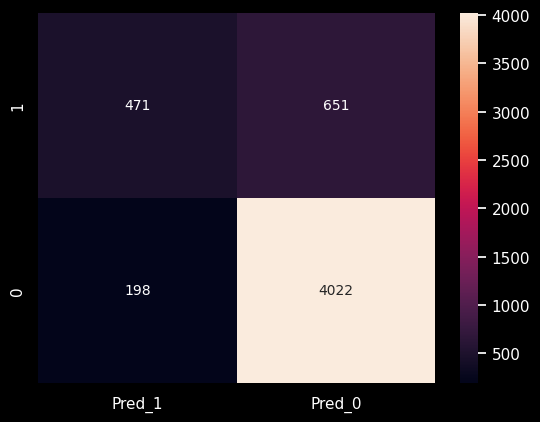

In [35]:
# Confusion matrix
pred = log_RandomGrid.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

### **Decision Tree Classifier Model**

#### Without Tuning

In [36]:
# Initializing model
model_dtc = DecisionTreeClassifier()

In [37]:
# Fitting model without tuning for comparision
model_dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [38]:
# Evaluating model performance
print (f'Train Accuracy - : {model_dtc.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {model_dtc.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.99991
Test Accuracy - : 0.75028


In [39]:
# Classification Report
class_report = classification_report(Y_test, model_dtc.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4220
           1       0.41      0.46      0.44      1122

    accuracy                           0.75      5342
   macro avg       0.63      0.64      0.64      5342
weighted avg       0.76      0.75      0.75      5342



<Axes: >

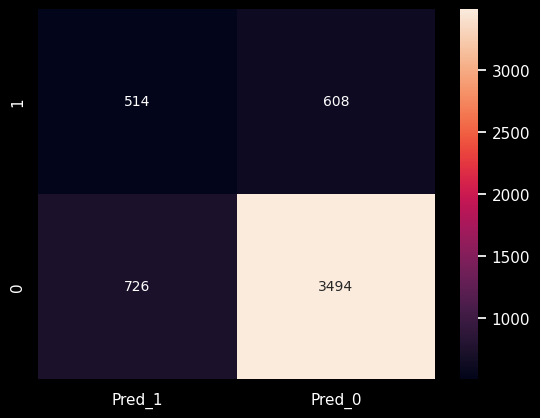

In [40]:
# Confusion matrix
pred = model_dtc.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

#### With Tuning

In [41]:
# For finding the optimum value of hyperparameters
param_grid_dtc = {'criterion': ['gini', 'entropy'],
                  'max_depth': range(5, 20),
                  'min_samples_leaf': range(1, 10),
                  'min_samples_split': range(2, 10),
                  'max_features': ['auto', 'sqrt', 'log2']}

# Creating the RandomizedSearchCV object
dtc_RandomGrid = RandomizedSearchCV(model_dtc,
                                    param_distributions=param_grid_dtc,
                                    verbose=2,
                                    n_iter=20,
                                    scoring='accuracy',
                                    cv=5,
                                    random_state=1)

# Fitting the tuned model with optimum values of hyperparamters
dtc_RandomGrid.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=6, min_samples_split=7; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5; t

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 20),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)},
                   random_state=1, scoring='accuracy', verbose=2)

In [42]:
# The best values of hyperparameters
dtc_RandomGrid.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'entropy'}

In [43]:
# The best model
dtc_RandomGrid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_leaf=7, min_samples_split=3)

In [44]:
# Evaluating model performance
print (f'Train Accuracy - : {dtc_RandomGrid.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {dtc_RandomGrid.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.83333
Test Accuracy - : 0.82329


In [45]:
# Classification Report
class_report = classification_report(Y_test, dtc_RandomGrid.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4220
           1       0.64      0.36      0.46      1122

    accuracy                           0.82      5342
   macro avg       0.74      0.65      0.68      5342
weighted avg       0.80      0.82      0.80      5342



<Axes: >

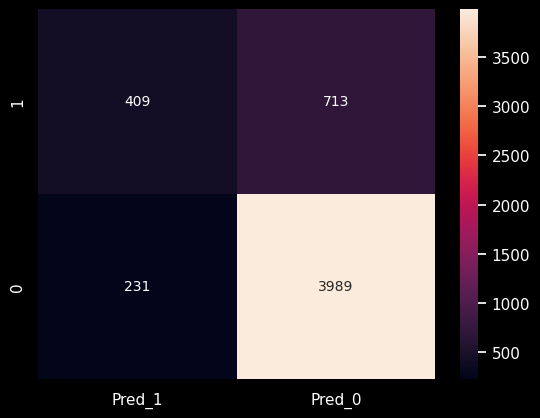

In [46]:
# Confusion matrix
pred = dtc_RandomGrid.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

### **Bagging Classifier Model**

#### Without Tuning

In [47]:
# Initializing model
model_bag = BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [48]:
# Fitting model without tuning for comparision
model_bag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [49]:
# Evaluating model performance
print (f'Train Accuracy - : {model_bag.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {model_bag.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.98338
Test Accuracy - : 0.82647


In [50]:
# Classification Report
class_report = classification_report(Y_test, model_bag.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      4220
           1       0.64      0.39      0.49      1122

    accuracy                           0.83      5342
   macro avg       0.75      0.67      0.69      5342
weighted avg       0.81      0.83      0.81      5342



<Axes: >

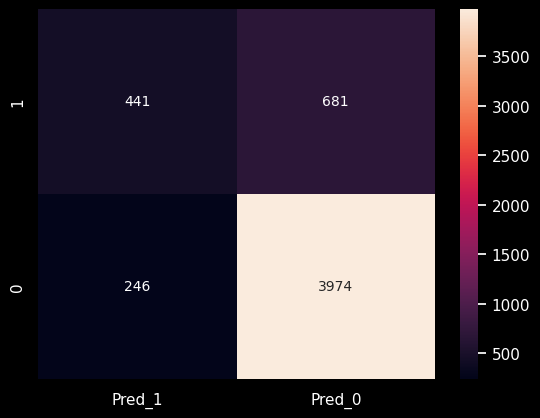

In [51]:
# Confusion matrix
pred = model_bag.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

#### With Tuning

In [52]:
# For finding the optimum value of hyperparameters
param_grid_bag = {'base_estimator__max_depth' : [1, 2, 3, 4, 5],
                  'n_estimators': [100, 200, 300, 400, 500],
                  'max_samples': [0.5, 0.75, 1.0],
                  'bootstrap': [True, False],
                  'max_features': [0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.95 ]}

# Creating the RandomizedSearchCV object
bag_RandomGrid = RandomizedSearchCV(model_bag,
                                    param_distributions=param_grid_bag,
                                    verbose=2,
                                    n_iter=20,
                                    scoring='accuracy',
                                    cv=5,
                                    random_state=1)

# Fitting the tuned model with optimum values of hyperparamters
bag_RandomGrid.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END base_estimator__max_depth=3, bootstrap=False, max_features=0.3, max_samples=0.75, n_estimators=200; total time=   2.1s
[CV] END base_estimator__max_depth=3, bootstrap=False, max_features=0.3, max_samples=0.75, n_estimators=200; total time=   2.1s
[CV] END base_estimator__max_depth=3, bootstrap=False, max_features=0.3, max_samples=0.75, n_estimators=200; total time=   2.0s
[CV] END base_estimator__max_depth=3, bootstrap=False, max_features=0.3, max_samples=0.75, n_estimators=200; total time=   2.0s
[CV] END base_estimator__max_depth=3, bootstrap=False, max_features=0.3, max_samples=0.75, n_estimators=200; total time=   2.2s
[CV] END base_estimator__max_depth=3, bootstrap=False, max_features=0.6, max_samples=0.75, n_estimators=400; total time=   6.5s
[CV] END base_estimator__max_depth=3, bootstrap=False, max_features=0.6, max_samples=0.75, n_estimators=400; total time=   6.9s
[CV] END base_estimator__max_depth=3, boot

RandomizedSearchCV(cv=5,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=20,
                   param_distributions={'base_estimator__max_depth': [1, 2, 3,
                                                                      4, 5],
                                        'bootstrap': [True, False],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.8, 0.95],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=1, scoring='accuracy', verbose=2)

In [53]:
# The best values of hyperparameters
bag_RandomGrid.best_params_

{'n_estimators': 300,
 'max_samples': 0.75,
 'max_features': 0.8,
 'bootstrap': True,
 'base_estimator__max_depth': 4}

In [54]:
# The best model
bag_RandomGrid.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                  max_features=0.8, max_samples=0.75, n_estimators=300)

In [55]:
# Evaluating model performance
print (f'Train Accuracy - : {bag_RandomGrid.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {bag_RandomGrid.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.83333
Test Accuracy - : 0.84051


In [56]:
# Classification Report
class_report = classification_report(Y_test, bag_RandomGrid.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      4220
           1       0.72      0.40      0.51      1122

    accuracy                           0.84      5342
   macro avg       0.79      0.68      0.71      5342
weighted avg       0.83      0.84      0.82      5342



<Axes: >

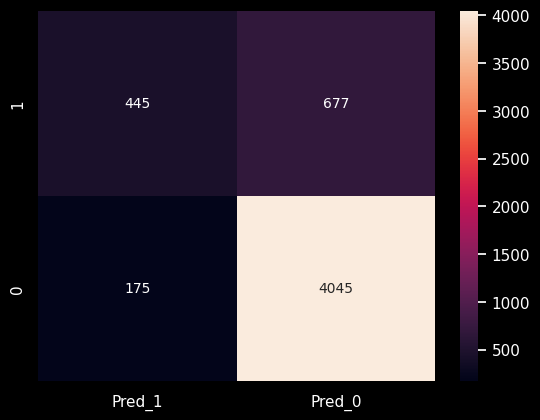

In [57]:
# Confusion matrix
pred = bag_RandomGrid.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

### **Adaboost Classifier Model**

#### Without Tuning

In [58]:
# Initializing model
model_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [59]:
# Fitting model without tuning for comparision
model_ada.fit(X_train,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [60]:
# Evaluating model performance
print (f'Train Accuracy - : {model_ada.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {model_ada.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.99991
Test Accuracy - : 0.74335


In [61]:
# Classification Report
class_report = classification_report(Y_test, model_ada.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      4220
           1       0.40      0.42      0.41      1122

    accuracy                           0.74      5342
   macro avg       0.62      0.63      0.62      5342
weighted avg       0.75      0.74      0.75      5342



<Axes: >

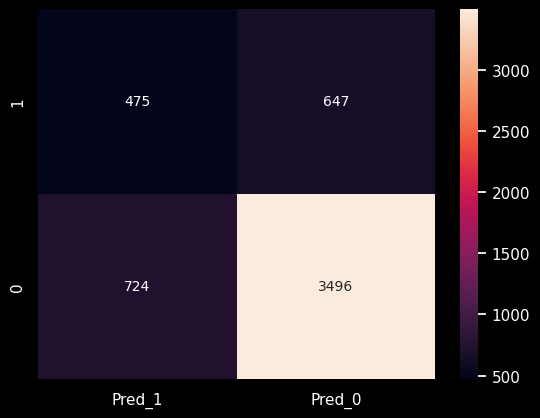

In [62]:
# Confusion matrix
pred = model_ada.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

#### With Tuning

In [63]:
# For finding the optimum value of hyperparameters
param_grid_ada = {'base_estimator__max_depth':[i for i in range(2,9,2)],
                  'base_estimator__min_samples_leaf':[5,10],
                  'n_estimators': [50, 100, 150, 200, 250],
                  'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                  'algorithm': ['SAMME', 'SAMME.R']}

# Creating the RandomizedSearchCV object
ada_RandomGrid = RandomizedSearchCV(model_ada,
                                    param_distributions=param_grid_ada,
                                    verbose=2,
                                    n_iter=20,
                                    scoring='accuracy',
                                    cv=5,
                                    random_state=1)

# Fitting the tuned model with optimum values of hyperparamters
ada_RandomGrid.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END algorithm=SAMME.R, base_estimator__max_depth=8, base_estimator__min_samples_leaf=10, learning_rate=0.5, n_estimators=200; total time=  13.2s
[CV] END algorithm=SAMME.R, base_estimator__max_depth=8, base_estimator__min_samples_leaf=10, learning_rate=0.5, n_estimators=200; total time=  12.9s
[CV] END algorithm=SAMME.R, base_estimator__max_depth=8, base_estimator__min_samples_leaf=10, learning_rate=0.5, n_estimators=200; total time=  12.9s
[CV] END algorithm=SAMME.R, base_estimator__max_depth=8, base_estimator__min_samples_leaf=10, learning_rate=0.5, n_estimators=200; total time=  13.1s
[CV] END algorithm=SAMME.R, base_estimator__max_depth=8, base_estimator__min_samples_leaf=10, learning_rate=0.5, n_estimators=200; total time=  13.0s
[CV] END algorithm=SAMME, base_estimator__max_depth=6, base_estimator__min_samples_leaf=10, learning_rate=0.1, n_estimators=50; total time=   2.3s
[CV] END algorithm=SAMME, base_estimator_

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=20,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'base_estimator__max_depth': [2, 4, 6,
                                                                      8],
                                        'base_estimator__min_samples_leaf': [5,
                                                                             10],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   random_state=1, scoring='accuracy', verbose=2)

In [64]:
# The best values of hyperparameters
ada_RandomGrid.best_params_

{'n_estimators': 200,
 'learning_rate': 0.5,
 'base_estimator__min_samples_leaf': 5,
 'base_estimator__max_depth': 2,
 'algorithm': 'SAMME.R'}

In [65]:
# The best model
ada_RandomGrid.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.5, n_estimators=200)

In [66]:
# Evaluating model performance
print (f'Train Accuracy - : {ada_RandomGrid.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {ada_RandomGrid.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.84287
Test Accuracy - : 0.84800


In [67]:
# Classification Report
class_report = classification_report(Y_test, ada_RandomGrid.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4220
           1       0.71      0.47      0.56      1122

    accuracy                           0.85      5342
   macro avg       0.79      0.71      0.74      5342
weighted avg       0.84      0.85      0.84      5342



<Axes: >

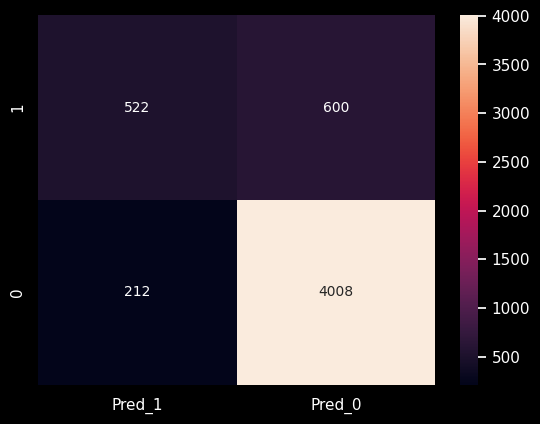

In [68]:
# Confusion matrix
pred = ada_RandomGrid.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

### **Gradient Boosting Classifier**

#### Without Tuning

In [69]:
# Initializing model
model_grad= GradientBoostingClassifier()

In [70]:
# Fitting model without tuning for comparision
model_grad.fit(X_train,Y_train)

GradientBoostingClassifier()

In [71]:
# Evaluating model performance
print (f'Train Accuracy - : {model_grad.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {model_grad.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.84297
Test Accuracy - : 0.84762


In [72]:
# Classification Report
class_report = classification_report(Y_test, model_grad.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4220
           1       0.72      0.45      0.55      1122

    accuracy                           0.85      5342
   macro avg       0.79      0.70      0.73      5342
weighted avg       0.84      0.85      0.83      5342



<Axes: >

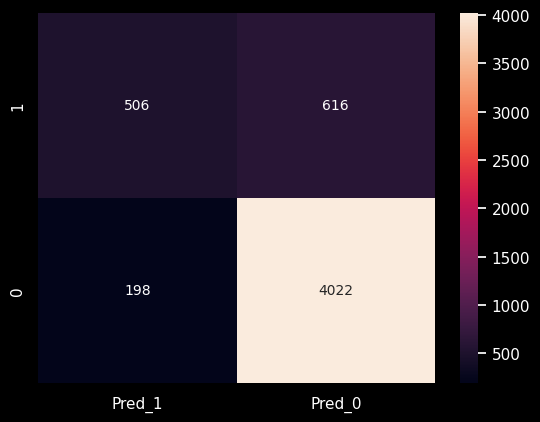

In [73]:
# Confusion matrix
pred = model_grad.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

#### With Tuning

In [74]:
# For finding the optimum value of hyperparameters
param_grid_grad = {
    'n_estimators': [50, 100, 200,300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 8],
    'min_samples_split': [2, 5,7, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Create RandomizedSearchCV object
grad_RandomGrid = RandomizedSearchCV(model_grad,
                                     param_distributions=param_grid_grad,
                                     verbose=2,
                                     n_iter=20,
                                     scoring='accuracy',
                                     cv=5,
                                     random_state=1)

# Fitting the tuned model with optimum values of hyperparamters
grad_RandomGrid.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300, subsample=0.8; total time=   7.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300, subsample=0.8; total time=   6.8s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300, subsample=0.8; total time=   7.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300, subsample=0.8; total time=   6.5s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300, subsample=0.8; total time=   7.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=0.9; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=0.9; total time=   2.4s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 8],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=1, scoring='accuracy', verbose=2)

In [75]:
# The best values of hyperparameters
grad_RandomGrid.best_params_

{'subsample': 0.8,
 'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'learning_rate': 0.1}

In [76]:
# The best model
grad_RandomGrid.best_estimator_

GradientBoostingClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=7,
                           subsample=0.8)

In [77]:
# Evaluating model performance
print (f'Train Accuracy - : {grad_RandomGrid.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {grad_RandomGrid.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.86263
Test Accuracy - : 0.84613


In [78]:
# Classification Report
class_report = classification_report(Y_test, grad_RandomGrid.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4220
           1       0.70      0.46      0.56      1122

    accuracy                           0.85      5342
   macro avg       0.79      0.70      0.73      5342
weighted avg       0.83      0.85      0.83      5342



<Axes: >

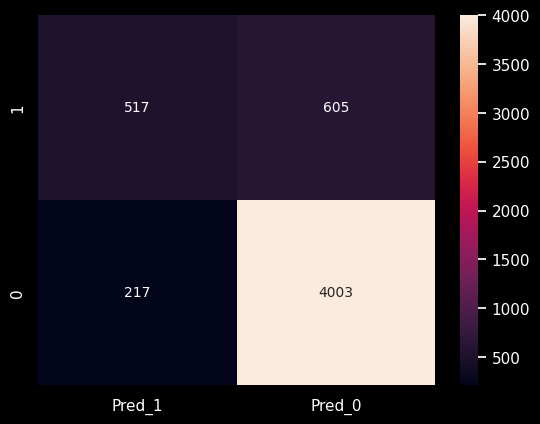

In [79]:
# Confusion matrix
pred = grad_RandomGrid.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

### **Random Forest Classifier Model**

#### Without Tuning

In [80]:
# Initializing model
model_rf = RandomForestClassifier()

In [81]:
# Fitting model without tuning for comparision
model_rf.fit(X_train,Y_train)

RandomForestClassifier()

In [82]:
# Evaluating model performance
print (f'Train Accuracy - : {model_rf.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {model_rf.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.99986
Test Accuracy - : 0.83714


In [83]:
# Classification Report
class_report = classification_report(Y_test, model_rf.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4220
           1       0.70      0.40      0.51      1122

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.70      5342
weighted avg       0.82      0.84      0.82      5342



<Axes: >

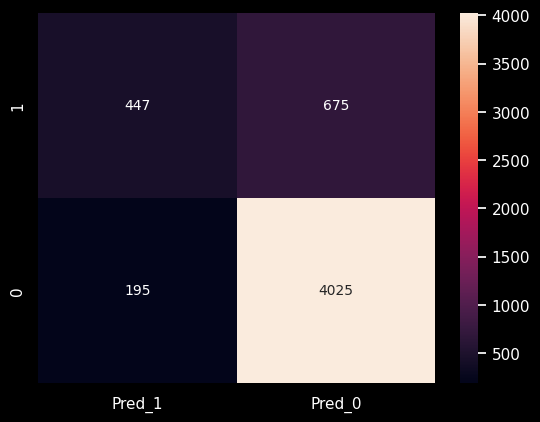

In [84]:
# Confusion matrix
pred = model_rf.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

#### With Tuning



In [68]:
# For finding the optimum value of hyperparameters
param_grid_rf = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15, 20, 25],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 2, 5, 10, 15],
              'bootstrap': [True, False]}

# Create RandomizedSearchCV object
rf_RandomGrid = RandomizedSearchCV(model_rf,
                                   param_distributions=param_grid_rf,
                                   verbose=2,
                                   n_iter=20,
                                   scoring='accuracy',
                                   cv=5,
                                   random_state=1)

# Fitting the tuned model with optimum values of hyperparamters
rf_RandomGrid.fit(X_train,Y_train)

NameError: name 'model_rf' is not defined

In [ ]:
# The best values of hyperparameters
rf_RandomGrid.best_params_

In [ ]:
# The best model
rf_RandomGrid.best_estimator_

In [88]:
# Evaluating model performance
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.92689
Test Accuracy - : 0.84013


In [89]:
# Classification Report
class_report = classification_report(Y_test, rf_RandomGrid.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      4220
           1       0.71      0.40      0.51      1122

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.71      5342
weighted avg       0.83      0.84      0.82      5342



<Axes: >

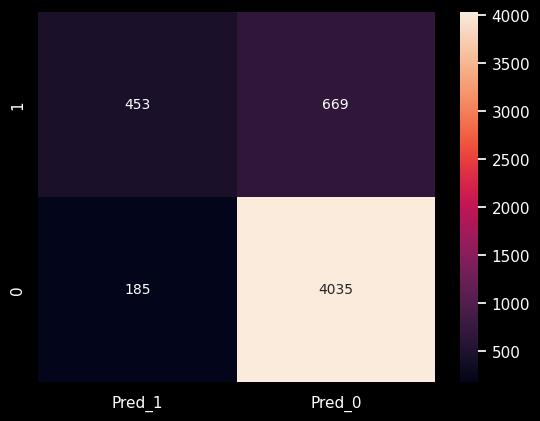

In [90]:
# Confusion matrix
pred = rf_RandomGrid.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

### SVC Model

#### Without Tuning

In [29]:
# Initializing model
model_svc = SVC()

In [30]:
# Fitting model without tuning for comparision
model_svc.fit(X_train,Y_train)

SVC()

In [31]:
# Evaluating model performance
print (f'Train Accuracy - : {model_svc.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {model_svc.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.85879
Test Accuracy - : 0.83864


In [32]:
# Classification Report
class_report = classification_report(Y_test, model_svc.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4220
           1       0.69      0.42      0.52      1122

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.71      5342
weighted avg       0.82      0.84      0.82      5342



<Axes: >

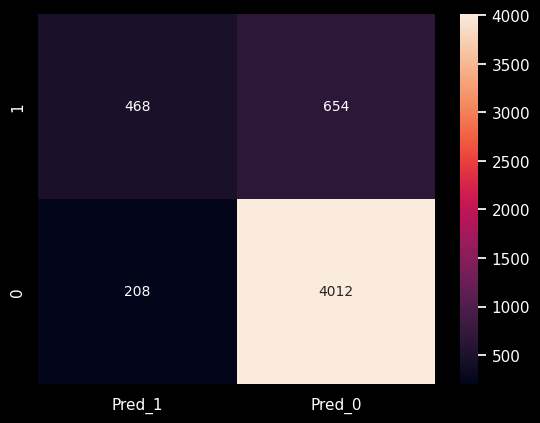

In [33]:
# Confusion matrix
pred = model_svc.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')

#### With Tuning

⭐**Note:**

* Here we only use sample of complete training data so as to reduce the execution time for fitting the Random grid object.
* With complete data it may take hours for fitting
* Other Random grids are trained on full training data i.e 80% data for better analysis of data to find best values of hyperparameters for whole data rather than just a sample and also other models take less time to fit per epoch

In [34]:
# For finding the optimum value of hyperparameters
param_grid_svc = {'C': [ 0.01,0.1,1, 10,100],
                  'gamma': [0.01,0.1, 1, 10,100],
                  'kernel': ['linear','sigmoid', 'poly','rbf'],
                  'degree' : [1,2,3]}

# Create RandomizedSearchCV object
svc_RandomGrid = RandomizedSearchCV(model_svc,
                                   param_distributions=param_grid_svc,
                                   verbose=2,
                                   n_iter = 30,
                                   scoring='accuracy',
                                   cv=5,
                                   random_state=1)

# Fitting the tuned model with optimum values of hyperparamters
svc_RandomGrid.fit(X_sample, Y_sample)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ............C=10, degree=1, gamma=1, kernel=sigmoid; total time=   0.8s
[CV] END ............C=10, degree=1, gamma=1, kernel=sigmoid; total time=   0.7s
[CV] END ............C=10, degree=1, gamma=1, kernel=sigmoid; total time=   0.7s
[CV] END ............C=10, degree=1, gamma=1, kernel=sigmoid; total time=   0.8s
[CV] END ............C=10, degree=1, gamma=1, kernel=sigmoid; total time=   0.9s
[CV] END ..............C=1, degree=1, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ..............C=1, degree=1, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ..............C=1, degree=1, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ..............C=1, degree=1, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ..............C=1, degree=1, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ..........C=10, degree=1, gamma=0.1, kernel=sigmoid; total time=   0.9s
[CV] END ..........C=10, degree=1, gamma=0.1, k

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=30,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'degree': [1, 2, 3],
                                        'gamma': [0.01, 0.1, 1, 10, 100],
                                        'kernel': ['linear', 'sigmoid', 'poly',
                                                   'rbf']},
                   random_state=1, scoring='accuracy', verbose=2)

In [35]:
# The best values of hyperparameters
svc_RandomGrid.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'degree': 1, 'C': 1}

In [36]:
# The best model
svc_RandomGrid.best_estimator_

SVC(C=1, degree=1, gamma=0.01)

In [39]:
# Evaluating model performance
print (f'Train Accuracy - : {svc_RandomGrid.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {svc_RandomGrid.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.83141
Test Accuracy - : 0.85118


In [41]:
# Creating  model with best hyperparameters and fitting it to entire training data
model_svc_tuned = SVC(C=1,
                      degree=1,
                      gamma=0.01,
                      kernel = 'rbf')


model_svc_tuned.fit(X_train,Y_train)

SVC(C=1, degree=1, gamma=0.01)

In [42]:
# Evaluating model performance
print (f'Train Accuracy - : {model_svc_tuned.score(X_train,Y_train):.5f}')
print (f'Test Accuracy - : {model_svc_tuned.score(X_test,Y_test):.5f}')

Train Accuracy - : 0.83904
Test Accuracy - : 0.84107


In [43]:
# Classification Report
class_report = classification_report(Y_test, svc_RandomGrid.predict(X_test))
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4220
           1       0.74      0.44      0.56      1122

    accuracy                           0.85      5342
   macro avg       0.81      0.70      0.73      5342
weighted avg       0.84      0.85      0.84      5342



<Axes: >

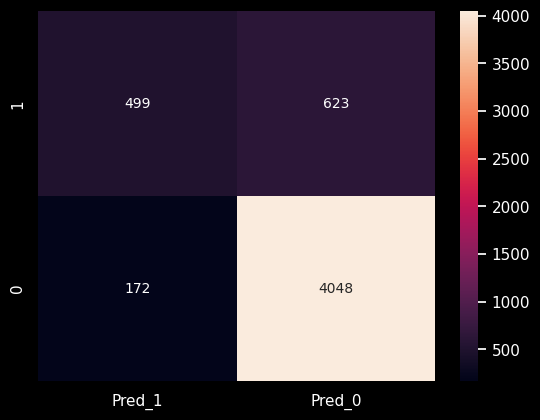

In [44]:
# Confusion matrix
pred = svc_RandomGrid.predict(X_test)
cm = confusion_matrix(Y_test,pred,labels = [1,0])
df_cm = pd.DataFrame(cm,index = [i for i in ['1','0']],columns = [i for i in ['Pred_1','Pred_0']])
sns.heatmap(df_cm,annot = True,fmt='g')